# Random variables and Distributions: Gaussian

Name: Arthur Pontes Nader

##### If you could only choose one distribution to take on a trip, I'm sure you would have to choose the Gaussian

## Libraries

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

The gaussian is a continuous distribution with two parameters: μ and σ. Being a continuous distribution, it doesn't has a pmf, it has a pdf, which stands for probability density function. The pdf of the gaussian is:

$$ f(x) = \frac{1}{\sqrt{2\pi\sigma}} exp^{(-\frac{1}{2}(\frac{x-\mu}{\sigma})²)} $$

## Gaussian distibution

Let's observe four gaussians for a better understand of the parameters:

In [7]:
def gaussian(mu, sigma, x):
    
    return stats.norm.pdf(x,mu,sigma)

In [8]:
x = np.linspace(-12, 12, 100)

pdf1 = gaussian(0, 1, x)
pdf2 = gaussian(2, 1, x)
pdf3 = gaussian(0, 4, x)
pdf4 = gaussian(2, 4, x)

Random samples from each distribution:

In [9]:
d1 = stats.norm.rvs(0, 1, 1000)
d2 = stats.norm.rvs(2, 1, 1000)
d3 = stats.norm.rvs(0, 4, 1000)
d4 = stats.norm.rvs(2, 4, 1000)

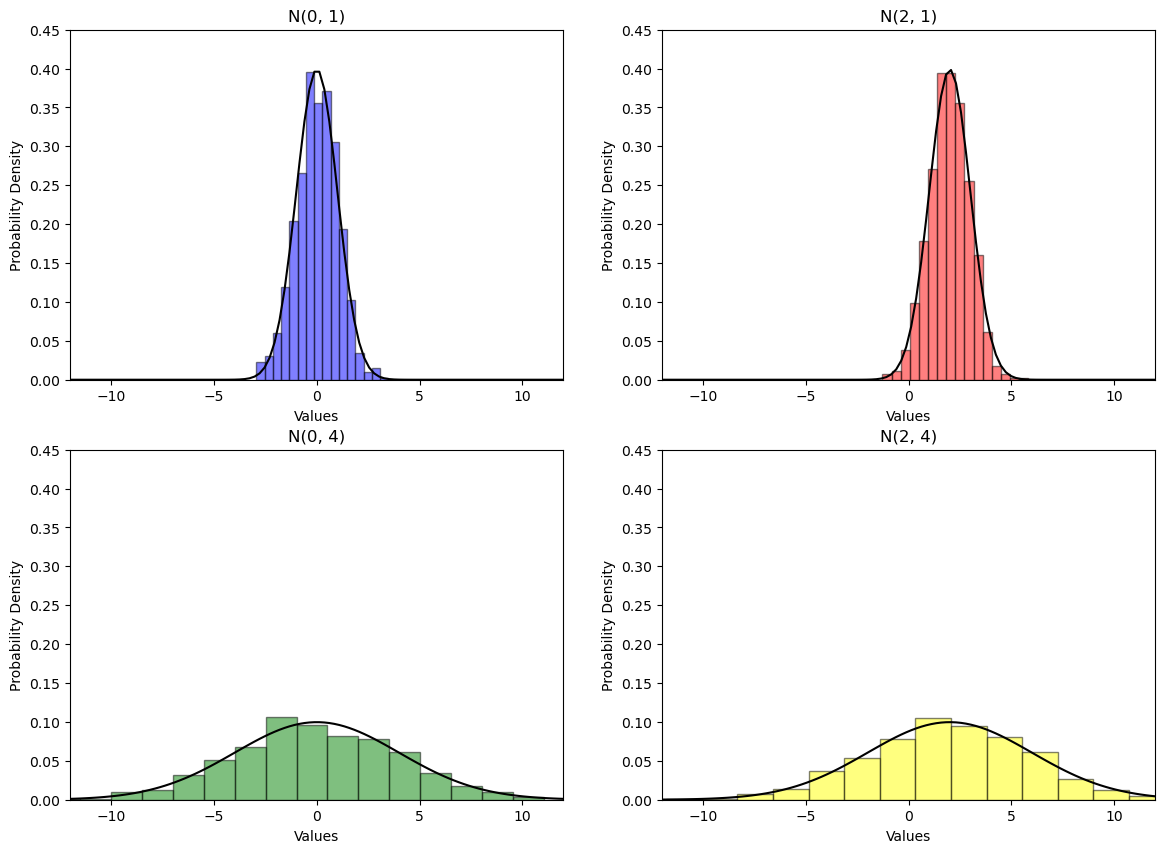

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

axs[0, 0].hist(d1, density=True, bins=16, alpha=0.5, color='blue', edgecolor = "black")
axs[0, 0].plot(x, pdf1, color='black')
axs[0, 0].set_title('N(0, 1)')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Probability Density')
axs[0, 0].set_ylim(0, 0.45)
axs[0, 0].set_xlim(-12, 12)

axs[0, 1].hist(d2, density=True, bins=16, alpha=0.5, color='red', edgecolor = "black")
axs[0, 1].plot(x, pdf2, color='black')
axs[0, 1].set_title('N(2, 1)')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Probability Density')
axs[0, 1].set_ylim(0, 0.45)
axs[0, 1].set_xlim(-12, 12)

axs[1, 0].hist(d3, density=True, bins=16, alpha=0.5, color='green', edgecolor = "black")
axs[1, 0].plot(x, pdf3, color='black')
axs[1, 0].set_title('N(0, 4)')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Probability Density')
axs[1, 0].set_ylim(0, 0.45)
axs[1, 0].set_xlim(-12, 12)

axs[1, 1].hist(d4, density=True, bins=16, alpha=0.5, color='yellow', edgecolor = "black")
axs[1, 1].plot(x, pdf4, color='black')
axs[1, 1].set_title('N(2, 4)')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Probability Density')
axs[1, 1].set_ylim(0, 0.45)
axs[1, 1].set_xlim(-12, 12)

plt.show()

The point x at which f(x) assumes its maximum value is exactly the mean of the distribution, given by the parameter μ. This point does not depend on σ, however the height f(x) at the maximum point depends on σ, as the probability density function at the maximum point is inversely proportional to σ. Thus, the greater the standard deviation, given by the σ parameter, the smaller the height of the PDF will be at the maximum point. Can you see how σ is related to the distribution of samples on the x-axis?

Let's observe the area under the curve of a N(10,5) between 10-2\*5 and 10+2\*5

In [57]:
dist = stats.norm(10, 5)

lim_inf = 10 - 2 * 5
lim_sup = 10 + 2 * 5
area = dist.cdf(lim_sup) - dist.cdf(lim_inf)

print(area)

0.9544997361036416


This is a general result: in the case of a Gaussian, the chance of observing a value more than 2σ away from the expected and central value µ is approximately 0.05.

As observed above, the histogram of the random samples closely resembles the shape of the distribution curve.

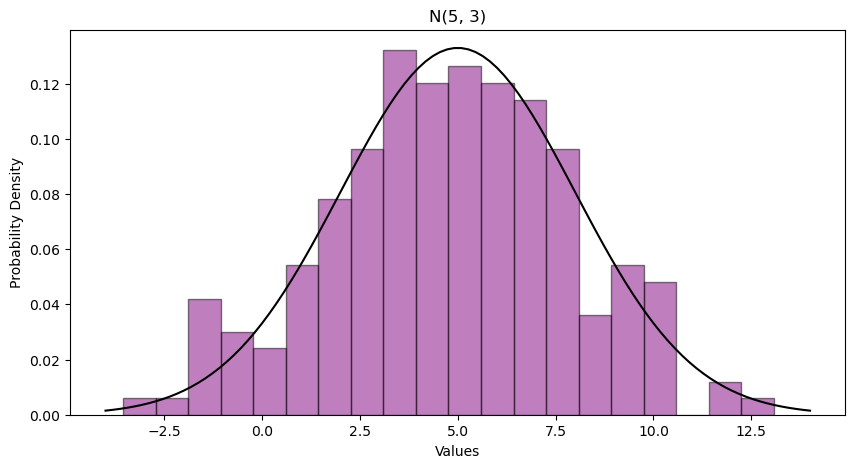

In [64]:
random_values = stats.norm.rvs(5, 3, size= 200)
x = np.linspace(-4, 14, 100)
pdf_normal = gaussian(5,3,x)

plt.figure(figsize=(10, 5))

plt.hist(random_values, density=True, bins=20, alpha=0.5, color='purple', edgecolor = "black")
plt.plot(x, pdf_normal, color='black')
plt.title('N(5, 3)')
plt.xlabel('Values')
plt.ylabel('Probability Density')

plt.show()

And it gets even closer as we increase the sample size

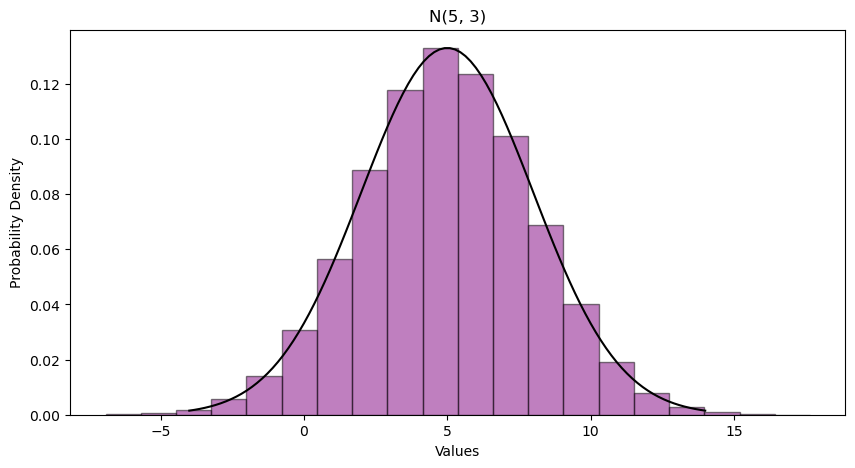

In [69]:
random_values = stats.norm.rvs(5, 3, size= 100000)
x = np.linspace(-4, 14, 100)
pdf_normal = gaussian(5,3,x)

plt.figure(figsize=(10, 5))

plt.hist(random_values, density=True, bins=20, alpha=0.5, color='purple', edgecolor = "black")
plt.plot(x, pdf_normal, color='black')
plt.title('N(5, 3)')
plt.xlabel('Values')
plt.ylabel('Probability Density')

plt.show()

## A brief history of MLE

In statistics, we frequently don't know the distribution our data comes from. In a frequentist approach to probability, we can use Maximum Likelihood Estimation (MLE) to estimate the parameters of our model. This process involves derivatives, logarithms, solving systems of equations for variables, and more. For now, it's enough to know that for a Gaussian distribution, you can find the parameters μ (mean) and σ (standard deviation) by calculating the mean and standard deviation of your data. 

Suppose we know that our data comes from a Gaussian distribution. Let's try to figure out its parameters:

In [35]:
possible_mus = [2,3,4,5,6]
possible_sigmas = [1,3,5]

In [50]:
mu = np.random.choice(possible_mus)
sigma = np.random.choice(possible_sigmas)

You have the following data:

In [52]:
data = stats.norm.rvs(mu, sigma, 1000)

In [53]:
data[:50]

array([ -3.87133905,  -2.18553231,   2.98301746,   4.61615856,
         4.71445664,   1.34239163,  -0.28513402,   1.17812582,
         3.97565467,   2.91783064,  -0.1853095 ,   8.79567122,
        14.73568124,  -2.66780878, -10.27235239,  -5.08270018,
         3.77011046,   5.1496129 ,   6.29461518,  -5.32922446,
        -3.35299631,   2.46456984,   4.29322891,   7.09127845,
         5.28060147,  -3.88090105,  -0.04380502,   5.32321423,
         3.30413044,   4.56795507,  11.24923196,   4.27865517,
         5.82242455,   5.02305806,   1.94428067, -11.29473886,
        -4.98756484,  -3.07653765,   6.34978365,  -5.36796234,
         1.95431496,   0.060341  ,   3.27377621,   0.75320396,
         0.93314401,  12.21074566,  -2.31772661,   0.88245684,
         9.2387015 ,   0.13111376])

It's a little challenging to discover these parameters just by observing the data. So, let's use the mean and std functions to estimate them:

In [54]:
data.mean()

2.1333921541460903

In [55]:
data.std()

4.984534313469406

Oh, it seems like our μ is 2 and σ is 5!

In [56]:
mu, sigma

(2, 5)

We nailed it. But remember, in a real situation we don't have access to the possibilities of mu and sigma like we did here. You have just the data!